In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Import csv
Uber=pd.read_csv("~/Desktop/UberRequestData.csv")

In [3]:
#Check top 5 rows
pd.set_option('display.max_columns',None)
print(Uber.head())

#Check bottom 5 rows
print(Uber.tail())

   Request id Pickup point  Driver id          Status Request timestamp  \
0         619      Airport        1.0  Trip Completed  11-07-2016 11:51   
1         867      Airport        1.0  Trip Completed  11-07-2016 17:57   
2        1807         City        1.0  Trip Completed  12-07-2016 09:17   
3        2532      Airport        1.0  Trip Completed  12-07-2016 21:08   
4        3112         City        1.0  Trip Completed  13-07-2016 08:33   

     Drop timestamp  
0  11-07-2016 13:00  
1  11-07-2016 18:47  
2  12-07-2016 09:58  
3  12-07-2016 22:03  
4  13-07-2016 09:25  
      Request id Pickup point  Driver id             Status Request timestamp  \
6740        6745         City        NaN  No Cars Available  15-07-2016 23:49   
6741        6752      Airport        NaN  No Cars Available  15-07-2016 23:50   
6742        6751         City        NaN  No Cars Available  15-07-2016 23:52   
6743        6754         City        NaN  No Cars Available  15-07-2016 23:54   
6744        

In [4]:
#Check number of rows
print(Uber.shape)

#Check number of columns
print(Uber.columns)

(6745, 6)
Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')


In [5]:
#Check data types
Uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [6]:
# Removing space from column names
Uber.columns = Uber.columns.str.replace(' ', '')

## Coverting Object to Datetimestamp for date columns

In [7]:
#Correcting data types
Uber['Requesttimestamp'] = pd.to_datetime(Uber['Requesttimestamp'])
Uber['Droptimestamp'] = pd.to_datetime(Uber['Droptimestamp'])

In [8]:
# Rows containing duplicate data
duplicate_rows_df = Uber[Uber.duplicated()]
print("duplicate rows: ", duplicate_rows_df.shape)

duplicate rows:  (0, 6)


In [9]:
#Check for missing values
Uber.isnull().sum()

Requestid              0
Pickuppoint            0
Driverid            2650
Status                 0
Requesttimestamp       0
Droptimestamp       3914
dtype: int64

## Question 1: There are missing values in Driverid and Droptimestamp, but driverid is not needed in analysis hence we can drop that column and further in the analysis I checked which are the 3914 missing values in Droptimestamp, so those missing time stamps for trips which were cancelled or for car not available, therefore as the trip was not completed there is no time stamp in that respective column, hence we can say that data is clean and there is no missing value.

In [10]:
#As driver id does not contribute in analysis hence we can drop it
Uber.drop(['Driverid'], axis=1, inplace=True)

In [11]:
#Frequency distribution of values in variables
col_names=['Pickuppoint','Status']
#col_names=['Pickuppoint','Status','day_of_week']


for col in col_names:
    
    print(Uber[col].value_counts())
    print("------------------------------------")


City       3507
Airport    3238
Name: Pickuppoint, dtype: int64
------------------------------------
Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64
------------------------------------


In [12]:
Uber['day_of_week'] = Uber['Requesttimestamp'].dt.day_name()

In [13]:
Uber['RequestHour'] = Uber['Requesttimestamp'].dt.hour

In [14]:
# create a list of our conditions
conditions = [
    (Uber['RequestHour'] >= 0) & (Uber['RequestHour'] < 4),
    (Uber['RequestHour'] >= 4) & (Uber['RequestHour'] < 8),
    (Uber['RequestHour'] >= 8) & (Uber['RequestHour'] < 12),
    (Uber['RequestHour'] >= 12) & (Uber['RequestHour'] < 16),
    (Uber['RequestHour'] >= 16) & (Uber['RequestHour'] < 20),
    (Uber['RequestHour'] >= 20) & (Uber['RequestHour'] < 24)
    ]


# create a list of the values we want to assign for each condition
values = ['Late Night','Early Morning', 'Morning', 'Afternoon', 'Evening','Night']

# create a new column and use np.select to assign values to it using our lists as arguments
Uber['TimeSlot'] = np.select(conditions, values)


In [15]:
Completed = Uber['Status'] == "Trip Completed"
print(Uber[Completed].isnull().sum())
Completed=Uber[Completed].copy()
Completed

Requestid           0
Pickuppoint         0
Status              0
Requesttimestamp    0
Droptimestamp       0
day_of_week         0
RequestHour         0
TimeSlot            0
dtype: int64


,Requestid,Pickuppoint,Status,Requesttimestamp,Droptimestamp,day_of_week,RequestHour,TimeSlot
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,Monday,11,Morning
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,Monday,17,Evening
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,Wednesday,9,Morning
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,Wednesday,21,Night
4,3112,City,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00,Wednesday,8,Morning
...,...,...,...,...,...,...,...,...
2826,1315,Airport,Trip Completed,2016-11-07 22:54:00,2016-11-07 23:35:00,Monday,22,Night
2827,2924,City,Trip Completed,2016-07-13 06:31:00,2016-07-13 07:20:00,Wednesday,6,Early Morning
2828,3324,Airport,Trip Completed,2016-07-13 12:33:00,2016-07-13 13:16:00,Wednesday,12,Afternoon
2829,3935,Airport,Trip Completed,2016-07-13 22:26:00,2016-07-13 23:43:00,Wednesday,22,Night


In [16]:
NotAvailable = Uber['Status'] == "No Cars Available"
print(Uber[NotAvailable].isnull().sum())
print(Uber[NotAvailable].shape)

#We can see all car rides where car was unavailable has no timestamp

Requestid              0
Pickuppoint            0
Status                 0
Requesttimestamp       0
Droptimestamp       2650
day_of_week            0
RequestHour            0
TimeSlot               0
dtype: int64
(2650, 8)


In [17]:
NotAvailable=Uber[NotAvailable].copy()

In [18]:
Cancelled = Uber['Status'] == "Cancelled"
Cancelled
print(Uber[Cancelled].isnull().sum())
print(Uber[Cancelled].shape)

#We can see all car rides which was cancelled has no timestamp

Requestid              0
Pickuppoint            0
Status                 0
Requesttimestamp       0
Droptimestamp       1264
day_of_week            0
RequestHour            0
TimeSlot               0
dtype: int64
(1264, 8)


In [19]:
Cancelled=Uber[Cancelled].copy()

Text(0.5, 1.0, 'Freqeuncy Distribution of Pick up point when demand is met')

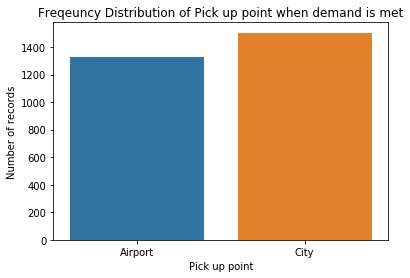

In [20]:
ax = sns.countplot(x="Pickuppoint", data=Completed)
ax.set(xlabel='Pick up point', ylabel='Number of records')
plt.title("Freqeuncy Distribution of Pick up point when demand is met")

## Question 2: City is more problematic may be because of the traffic and usually airport is in the outskirts of the city hence it is less problematic, but if observed clearly there is not much different in frequency counts for both pick up points

Text(0.5, 1.0, 'Freqeuncy Distribution of Pick up point when car not available')

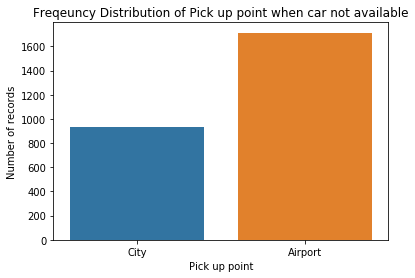

In [21]:
ax = sns.countplot(x="Pickuppoint", data=NotAvailable)
ax.set(xlabel='Pick up point', ylabel='Number of records')
plt.title("Freqeuncy Distribution of Pick up point when car not available")

Text(0.5, 1.0, 'Freqeuncy Distribution of Pick up point when trip is cancelled')

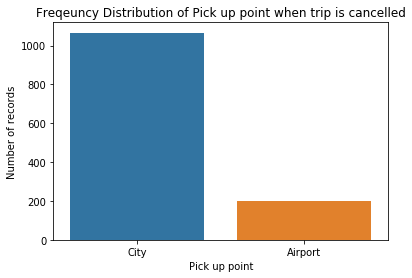

In [22]:
ax = sns.countplot(x="Pickuppoint", data=Cancelled)
ax.set(xlabel='Pick up point', ylabel='Number of records')
plt.title("Freqeuncy Distribution of Pick up point when trip is cancelled")

[Text(0, 0.5, 'Number of records'), Text(0.5, 0, 'Day Of Week')]

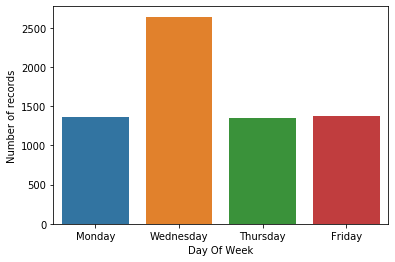

In [23]:
ax = sns.countplot(x="day_of_week", data=Uber)
ax.set(xlabel='Day Of Week', ylabel='Number of records')
#It seems Wednesday has most number of trip requests

Text(0.5, 1.0, 'Time Slot Distribution for Wednesday Cancelled trips')

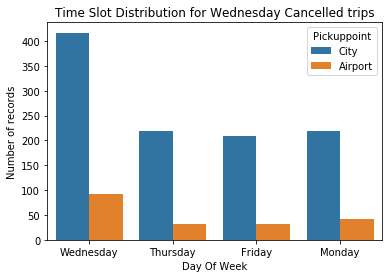

In [24]:
ax = sns.countplot(x="day_of_week", hue="Pickuppoint", data=Cancelled)
ax.set(xlabel='Day Of Week', ylabel='Number of records')
plt.title("Time Slot Distribution for Wednesday Cancelled trips")

## Question 3: Wednesday and the pick up point City has most of the trip of cancellations may be because on wednesday Traffic is more.

In [ ]:
WednesdayCancelled = Cancelled['day_of_week'] == "Wednesday"

In [ ]:
WednesdayCancelled=Cancelled[WednesdayCancelled]

In [ ]:
ax = sns.countplot(x="TimeSlot", hue="Pickuppoint", data=WednesdayCancelled)
ax.set(xlabel='Time Slot of day', ylabel='Number of records')
# Wednesday and City has most of the trip of cancellations may be because on wednesday Traffic is more.

In [ ]:
Completed

In [ ]:
pd.set_option('display.max_rows',None)
(Completed['Droptimestamp'] - Completed['Requesttimestamp']).days

In [ ]:
Completed['diff_hours']=Completed['Droptimestamp'] - Completed['Requesttimestamp']

Completed['diff_hours']==Completed['diff_hours']/np.timedelta64(1,'h')

print(Completed)
